In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Image Pre-processing & Augmentation**

**We will perform image pre-processing by applying rescaling operation on images and image augmentation by applying shear range , zoom rang and horizontal flip operation. This operation on images will create new image datset as an ouput of this operations and we will use the new dataset for training pupose. 
Image pre-processing & augmentation will help us to reduce overfitting.
Image augmentation will only be apply for train data and not test data.**

In [2]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Importing image path and output label into train and test dataframe respectively**

In [3]:
train_df = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_df = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')

In [4]:
train_df

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

**creating validation dataset from training dataset**

In [5]:
valid_df = train_df.sample(frac=0.2, random_state=42)
train_df = train_df.drop(valid_df.index)

# **Creating train, valid and test image directory with output label**

Here we will set the eqal image size for all images (255, 255), batch size=16, class mode will be sparse as we have 

In [6]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, # dataframe
    directory = "/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train", # images data path / folder in which images are there
    x_col = 'filename',
    y_col = 'label',
    color_mode = "rgb",
    target_size = (255, 255), # image height , image width
    class_mode = "sparse",
    batch_size = 16,
    shuffle = True,
    seed = 42)

valid_generator = train_datagen.flow_from_dataframe(
    valid_df, # dataframe
    directory = "/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train", # images data path / folder in which images are there
    x_col = 'filename',
    y_col = 'label',
    color_mode = "rgb",
    target_size = (255, 255), # image height , image width
    class_mode = "sparse",
    batch_size = 16,
    shuffle = True,
    seed = 42)





Found 10080 validated image filenames belonging to 15 classes.
Found 2520 validated image filenames belonging to 15 classes.


In [7]:
test_generator = test_datagen.flow_from_dataframe(
    test_df, # dataframe
    directory   = "//kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test", # images data path / folder in which images are there
    x_col       = 'filename',
    #y_col       = 'labels',
    color_mode  = "rgb",
    target_size = (255, 255), # image height , image width
    class_mode = None,
    batch_size  = 16,
    shuffle  = False)






Found 5400 validated image filenames.


In [8]:
train_df['label'].value_counts()

label
hugging               689
eating                689
drinking              688
running               685
clapping              680
sleeping              678
using_laptop          677
sitting               677
calling               667
listening_to_music    664
laughing              661
dancing               660
texting               657
cycling               654
fighting              654
Name: count, dtype: int64

# **Exporting one batch of images**

In [9]:
img, label = train_generator.next()

Text(0.5, 1.0, '14.0')

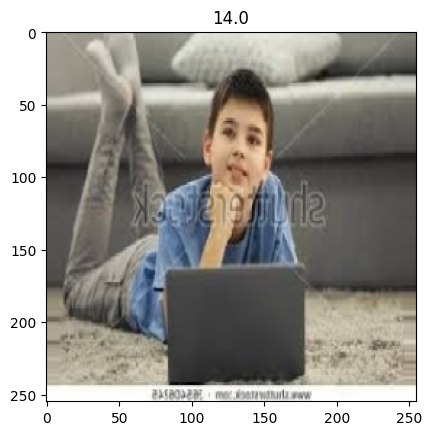

In [10]:
plt.imshow(img[8])
plt.title(label[8])

# Label creation

In [11]:
l = {0: 'calling', 1:'clapping', 2:'Cycling', 3: 'dancing', 4: 'drinking', 5: 'eating', 6: 'fighting', 7: 'hugging', 8: 'smilling', 9: 'listening_to_music', 10: 'running', 11: 'sitting',
     12: 'sleeping', 13: 'texting', 14:'using_laptop'}

# **Images with output labels**

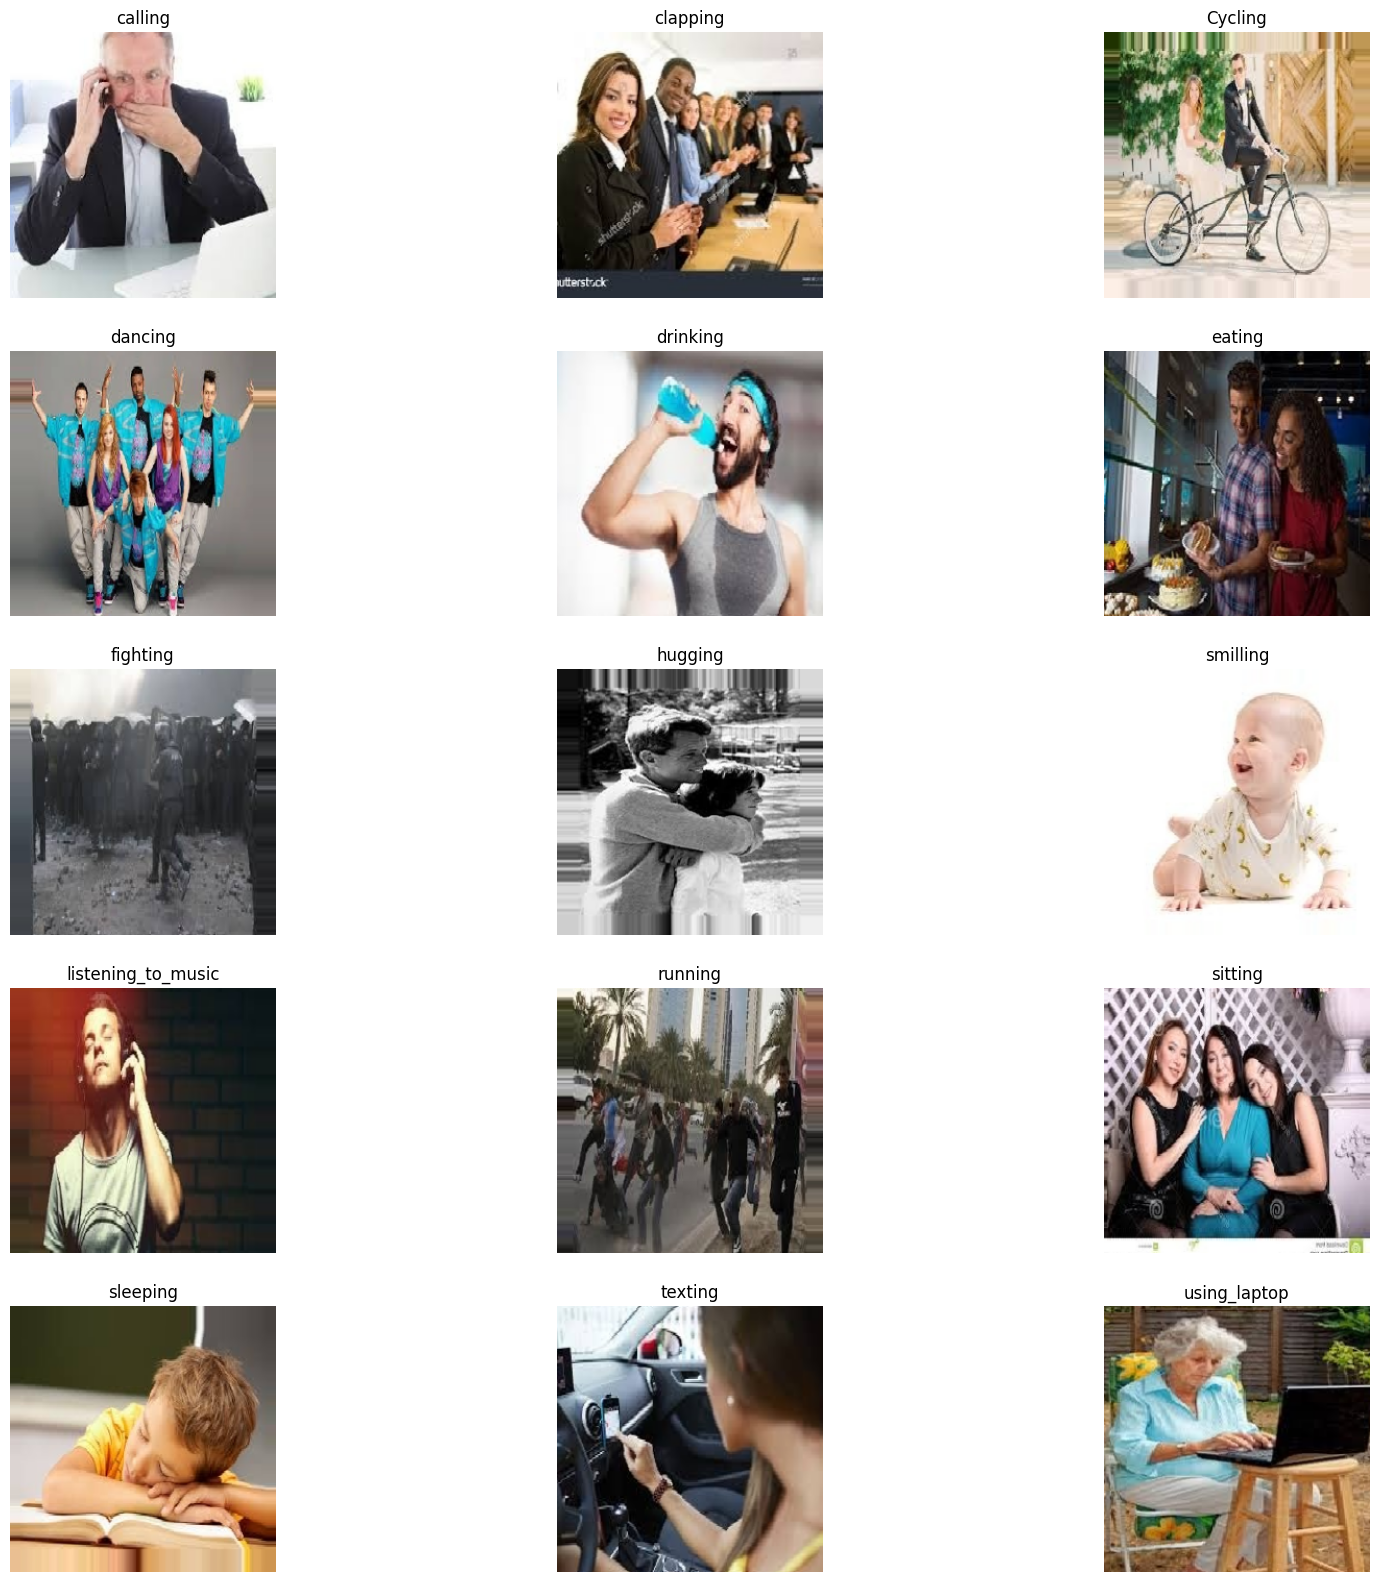

In [12]:
i=0
plt.figure(figsize=(20,20))
while i<15:
    if i in label:
      a = np.where(label==i)[0][0]
      plt.subplot(5,3,i+1)
      plt.imshow(img[a])
      plt.title(l[i])
      plt.axis('off')
      i+=1
    else:
      img, label = train_generator.next()


# **Importing Models**

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from tensorflow.keras.layers import Dropout


In [14]:
conv_base_vgg = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(255,255,3)
)

conv_base_Inception = InceptionV3(
    weights='imagenet',
    include_top = False,
    input_shape=(255,255,3)
)

conv_base_ResNet = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(255,255,3)
)

conv_base_xception = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(255,255,3)
)



83683744/83683744 [==============================] - 0s 0us/step


# **Checking model layers**



In [15]:

def model_layers(model_conv):

  model_conv.trainable = False

  for layer in model_conv.layers:
    print(layer.name,layer.trainable)

# **Fine tunning pre-trained models to capture more patterns from input images**

In CNN models there are 3 types of layers 1]Convolutional layer 2]Flatter layer and 3]Fully connected layers.
In convolutional layer we use filters to capture specific patterns from input images.
In flatten layer we convert 3 dimentional output array to 1 dimentional to send it to fully connected layers for prediction.
In Fully connected layers we do actual prediction of images.

We have already imported pre-trained models and convolutional layers of models with -predefined imagenet weights.

Imagenet weights will help us to capture basic features from input images as it is already trained on imagenet datasets. But in our project we will use bottom layers of convolution to capture more featured and patterns from our images to improve the accuracy of model.

We will use few starting convolutional layers with imagenet weights to capture basic patters and bottom convolutional layers to capture patterns from input images.

We will choose the no. of bottom layers thet we can use to train on image dataset by fine tuning.

In [16]:
def set_trainable(convbase, fine_tune):

    # fine_tune = no. of layers of model to freeze with imagenet weights.
  convbase.trainable = True

  #set_trainable = True
  for layer in convbase.layers[:fine_tune]:
    layer.trainable = False



  return convbase




# **VGG Model**


In [17]:
print("Number of layers in the VGG base model: ", len(conv_base_vgg.layers))


Number of layers in the VGG base model:  19


In [18]:
model_layers(conv_base_vgg)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In VGG model we will freeze first 5 trainable layers with imagenet weights and other layers will use for training purpose.

In [19]:
conv_base_vgg = set_trainable(conv_base_vgg, 5)

for layer in conv_base_vgg.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [20]:
conv_base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [21]:
model = Sequential()
model.add(conv_base_vgg)
model.add(Flatten())
model.add(Dense(2500,activation='relu'))
model.add(Dense(1035,activation='relu'))
model.add(Dense(650,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [22]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_generator,epochs=10, validation_data=valid_generator)

Epoch 1/10
630/630 [==============================] - 235s 349ms/step - loss: 2.8943 - accuracy: 0.0639 - val_loss: 3605012.0000 - val_accuracy: 0.0603
Epoch 2/10
630/630 [==============================] - 181s 288ms/step - loss: 2.7083 - accuracy: 0.0658 - val_loss: 3948527.2500 - val_accuracy: 0.0603
Epoch 3/10
630/630 [==============================] - 182s 289ms/step - loss: 2.7083 - accuracy: 0.0645 - val_loss: 2843438.0000 - val_accuracy: 0.0603
Epoch 4/10
630/630 [==============================] - 184s 292ms/step - loss: 2.7083 - accuracy: 0.0652 - val_loss: 3981959.0000 - val_accuracy: 0.0599
Epoch 5/10
630/630 [==============================] - 183s 290ms/step - loss: 2.7083 - accuracy: 0.0657 - val_loss: 2773406.7500 - val_accuracy: 0.0599
Epoch 6/10
630/630 [==============================] - 183s 291ms/step - loss: 2.7083 - accuracy: 0.0621 - val_loss: 5683394.0000 - val_accuracy: 0.0603
Epoch 7/10
630/630 [==============================] - 184s 292ms/step - loss: 2.7083 - a

In [24]:
conv_base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

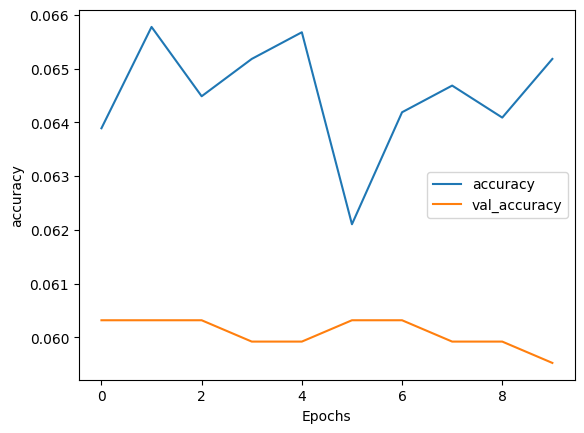

In [25]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'accuracy')

 **As we can see from above VGG model accuracy plot that model is overfirring and underfitting at tha same time. Valid aauracy is decreasing as train accuracy is fluctuating a lot with very low accuracy.**

# **Xception Model**

In [26]:
print("Number of layers in the Xception base model: ", len(conv_base_xception.layers))

Number of layers in the Xception base model:  132


In [27]:
model_layers(conv_base_xception)

input_4 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d_94 False
block2_pool False
batch_normalization_94 False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_95 False
block3_pool False
batch_normalization_95 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_96 False
block4_pool False
batch_normalization_96 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_

**There are total 132 trainable layers in Xception model and after fine tuning we will freeze first 45 layers with imagenet weight and will use remaining bottom layers for training purpose.**

In [28]:
conv_base_xception = set_trainable(conv_base_xception, 45)

for layer in conv_base_xception.layers:
    print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d_94 False
block2_pool False
batch_normalization_94 False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_95 False
block3_pool False
batch_normalization_95 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_96 False
block4_pool False
batch_normalization_96 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_

In [29]:
model_xception = Sequential()
model_xception.add(conv_base_xception)
model_xception.add(Flatten())
model_xception.add(Dense(2000,activation='relu'))
model_xception.add(Dropout(0.5))
model_xception.add(Dense(1024,activation='relu'))
model_xception.add(Dropout(0.5))
model_xception.add(Dense(700,activation='relu'))
model_xception.add(Dropout(0.5))
model_xception.add(Dense(150,activation='relu'))
model_xception.add(Dense(15,activation='softmax'))

In [30]:
model_xception.compile(optimizer=tf.keras.optimizers.Adam(1e-5) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history_excep = model_xception.fit(train_generator,epochs=10, validation_data=valid_generator)

Epoch 1/10
630/630 [==============================] - 204s 292ms/step - loss: 2.6124 - accuracy: 0.1516 - val_loss: 2.0567 - val_accuracy: 0.4167
Epoch 2/10
630/630 [==============================] - 183s 291ms/step - loss: 2.0201 - accuracy: 0.3594 - val_loss: 1.4691 - val_accuracy: 0.5595
Epoch 3/10
630/630 [==============================] - 180s 286ms/step - loss: 1.6184 - accuracy: 0.4899 - val_loss: 1.2235 - val_accuracy: 0.6294
Epoch 4/10
630/630 [==============================] - 187s 297ms/step - loss: 1.3757 - accuracy: 0.5766 - val_loss: 1.0799 - val_accuracy: 0.6714
Epoch 5/10
630/630 [==============================] - 183s 291ms/step - loss: 1.1693 - accuracy: 0.6435 - val_loss: 1.0082 - val_accuracy: 0.7024
Epoch 6/10
630/630 [==============================] - 182s 289ms/step - loss: 1.0330 - accuracy: 0.6888 - val_loss: 0.9408 - val_accuracy: 0.7262
Epoch 7/10
630/630 [==============================] - 183s 290ms/step - loss: 0.9326 - accuracy: 0.7231 - val_loss: 0.9331 -

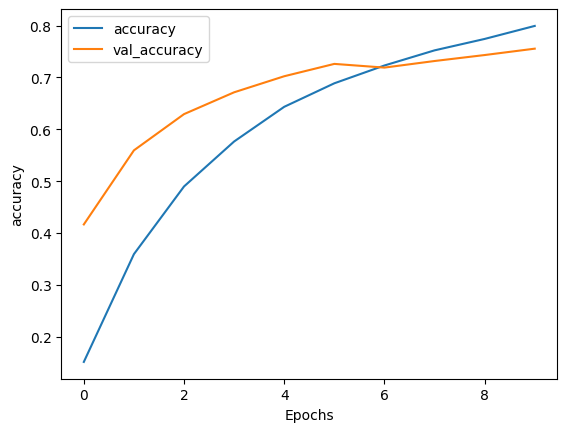

In [32]:
def plot_history(history_excep, key):
  plt.plot(history_excep.history[key])
  plt.plot(history_excep.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_excep, 'accuracy')

**As we can see from above plot that Xception model is giving good accuracy on both train and valid data and it's not overfitting much.**

# **Inception model**

In [33]:
print("Number of layers in the Inception base model: ", len(conv_base_Inception.layers))


Number of layers in the Inception base model:  311


In [34]:
model_layers(conv_base_Inception)

input_2 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

We have total 311 layers in Inception model and out of those we are freezing starting 100 layers with imagenet weight and will use remaining bottom layers to train on training data.

In [35]:
conv_base_Inception = set_trainable(conv_base_Inception, 100)

for layer in conv_base_Inception.layers:
    print(layer.name,layer.trainable)

input_2 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

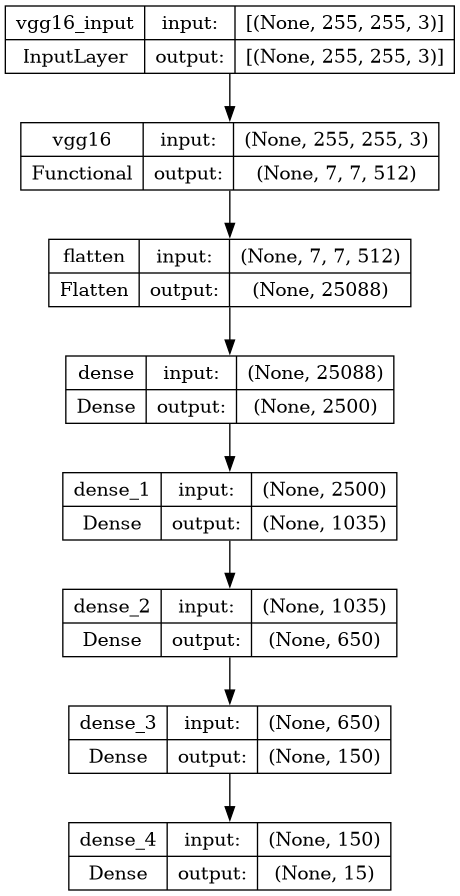

In [36]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [37]:
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



model_Inception = Sequential()
model_Inception.add(conv_base_Inception)
model_Inception.add(Flatten())
#model_Inception.add(Dense(3000,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model_Inception.add(Dropout(0.3))
model_Inception.add(Dense(2500,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
#model_Inception.add(Dropout(0.3))
model_Inception.add(Dense(1075,activation='relu',  kernel_regularizer=regularizers.l2(0.1)))
#model_Inception.add(Dropout(0.3))
model_Inception.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
#model_Inception.add(Dropout(0.3))
model_Inception.add(Dense(200,activation='relu'))
model_Inception.add(Dense(15,activation='softmax'))

In [38]:
model_Inception.compile(optimizer=tf.keras.optimizers.Adam(1e-5) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [39]:
history_Incep = model_Inception.fit(train_generator,epochs=10, validation_data=valid_generator)

Epoch 1/10
630/630 [==============================] - 207s 287ms/step - loss: 450.7630 - accuracy: 0.4627 - val_loss: 278.2197 - val_accuracy: 0.6286
Epoch 2/10
630/630 [==============================] - 179s 284ms/step - loss: 197.2684 - accuracy: 0.6340 - val_loss: 140.0012 - val_accuracy: 0.6341
Epoch 3/10
630/630 [==============================] - 179s 285ms/step - loss: 108.8879 - accuracy: 0.6993 - val_loss: 84.7405 - val_accuracy: 0.6921
Epoch 4/10
630/630 [==============================] - 179s 284ms/step - loss: 68.6942 - accuracy: 0.7318 - val_loss: 55.3795 - val_accuracy: 0.7095
Epoch 5/10
630/630 [==============================] - 178s 283ms/step - loss: 45.4323 - accuracy: 0.7639 - val_loss: 37.1102 - val_accuracy: 0.7329
Epoch 6/10
630/630 [==============================] - 179s 285ms/step - loss: 30.5897 - accuracy: 0.7904 - val_loss: 25.2494 - val_accuracy: 0.7294
Epoch 7/10
630/630 [==============================] - 187s 297ms/step - loss: 20.8883 - accuracy: 0.8095 - 

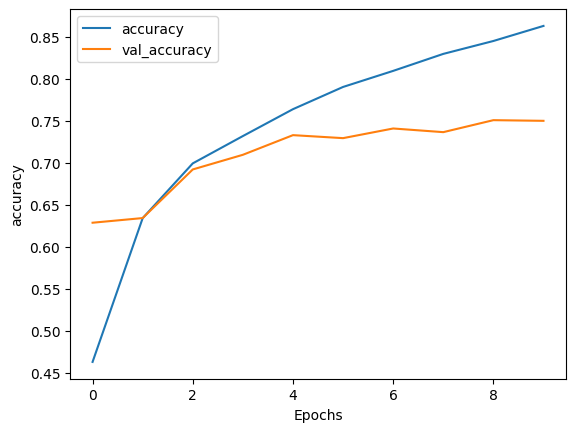

In [40]:
def plot_history(history_Incep, key):
  plt.plot(history_Incep.history[key])
  plt.plot(history_Incep.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_Incep, 'accuracy')

We can see from above plot that inception model is overfitting too much though the accuracy on train and valid data is not that bad.


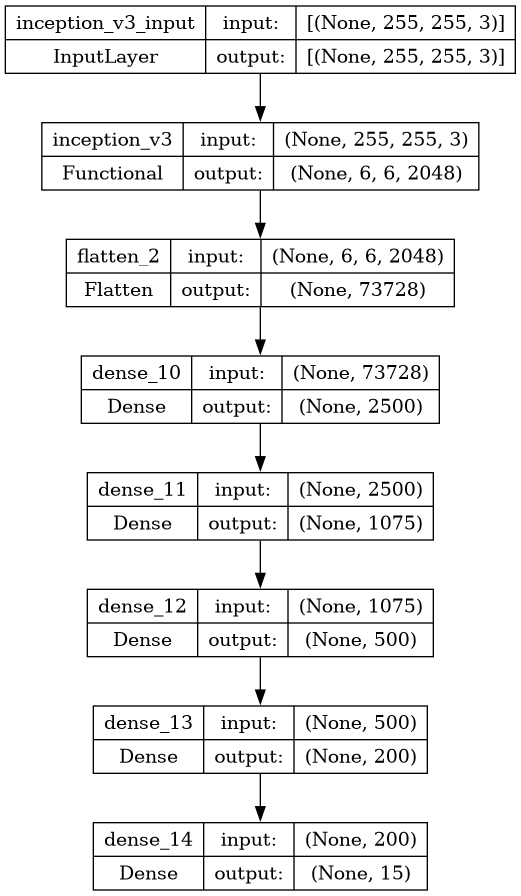

In [41]:
from keras.utils import plot_model
plot_model(model_Inception,show_shapes=True)

# **Resnet Model**

In [42]:
print("Number of layers in the Resnet base model: ", len(conv_base_ResNet.layers))


Number of layers in the Resnet base model:  175


In [43]:
model_layers(conv_base_ResNet)

input_3 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [44]:
conv_base_ResNet = set_trainable(conv_base_ResNet, 50)

for layer in conv_base_ResNet.layers:
    print(layer.name,layer.trainable)

input_3 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [45]:
model_Resnet = Sequential()
model_Resnet.add(conv_base_ResNet)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(2000,activation='relu'))
model_Resnet.add(Dropout(0.3))
model_Resnet.add(Dense(1050,activation='relu'))
model_Resnet.add(Dropout(0.3))
model_Resnet.add(Dense(600,activation='relu'))
model_Resnet.add(Dropout(0.3))
model_Resnet.add(Dense(250,activation='relu'))
model_Resnet.add(Dense(15,activation='softmax'))

In [46]:
model_Resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-5) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
history_Resnet = model_Resnet.fit(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
630/630 [==============================] - 210s 289ms/step - loss: 2.8272 - accuracy: 0.1143 - val_loss: 2.4194 - val_accuracy: 0.2095
Epoch 2/10
630/630 [==============================] - 181s 286ms/step - loss: 2.4926 - accuracy: 0.1964 - val_loss: 2.2136 - val_accuracy: 0.2734
Epoch 3/10
630/630 [==============================] - 185s 293ms/step - loss: 2.3090 - accuracy: 0.2514 - val_loss: 2.0804 - val_accuracy: 0.3163
Epoch 4/10
630/630 [==============================] - 182s 289ms/step - loss: 2.1731 - accuracy: 0.2910 - val_loss: 1.9636 - val_accuracy: 0.3583
Epoch 5/10
630/630 [==============================] - 183s 290ms/step - loss: 2.0351 - accuracy: 0.3371 - val_loss: 1.8907 - val_accuracy: 0.3829
Epoch 6/10
630/630 [==============================] - 182s 288ms/step - loss: 1.9434 - accuracy: 0.3676 - val_loss: 1.8199 - val_accuracy: 0.4095
Epoch 7/10
630/630 [==============================] - 192s 305ms/step - loss: 1.8492 - accuracy: 0.3973 - val_loss: 1.7542 -

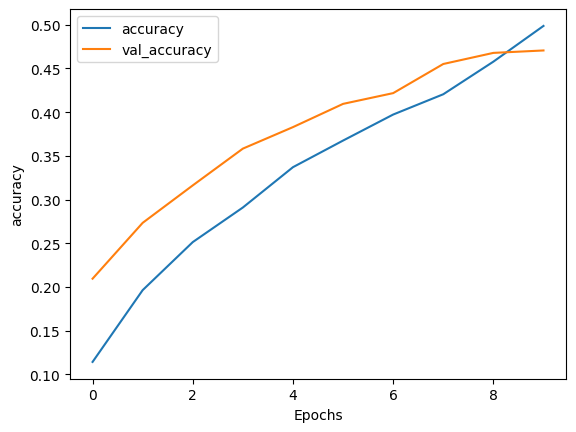

In [48]:
def plot_history(history_Resnet, key):
  plt.plot(history_Resnet.history[key])
  plt.plot(history_Resnet.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_Resnet, 'accuracy')

As we can see from above plot that resnet is not overfitting and trying to improve accuracy of model, but 50% accuracy is not that good.

From above resulis we can see Xception and Inception models are giving better results than other model. Let's test it on test dataset.

# **Test result of Xception model**

In [49]:
y_pred = model_xception.predict(test_generator)

338/338 [==============================] - 34s 97ms/step


In [50]:
y_pred.shape

(5400, 15)

In [51]:
y_pred_index = y_pred.argmax(axis=1)

In [52]:
img = test_generator.next()

In [53]:
img.shape

(16, 255, 255, 3)

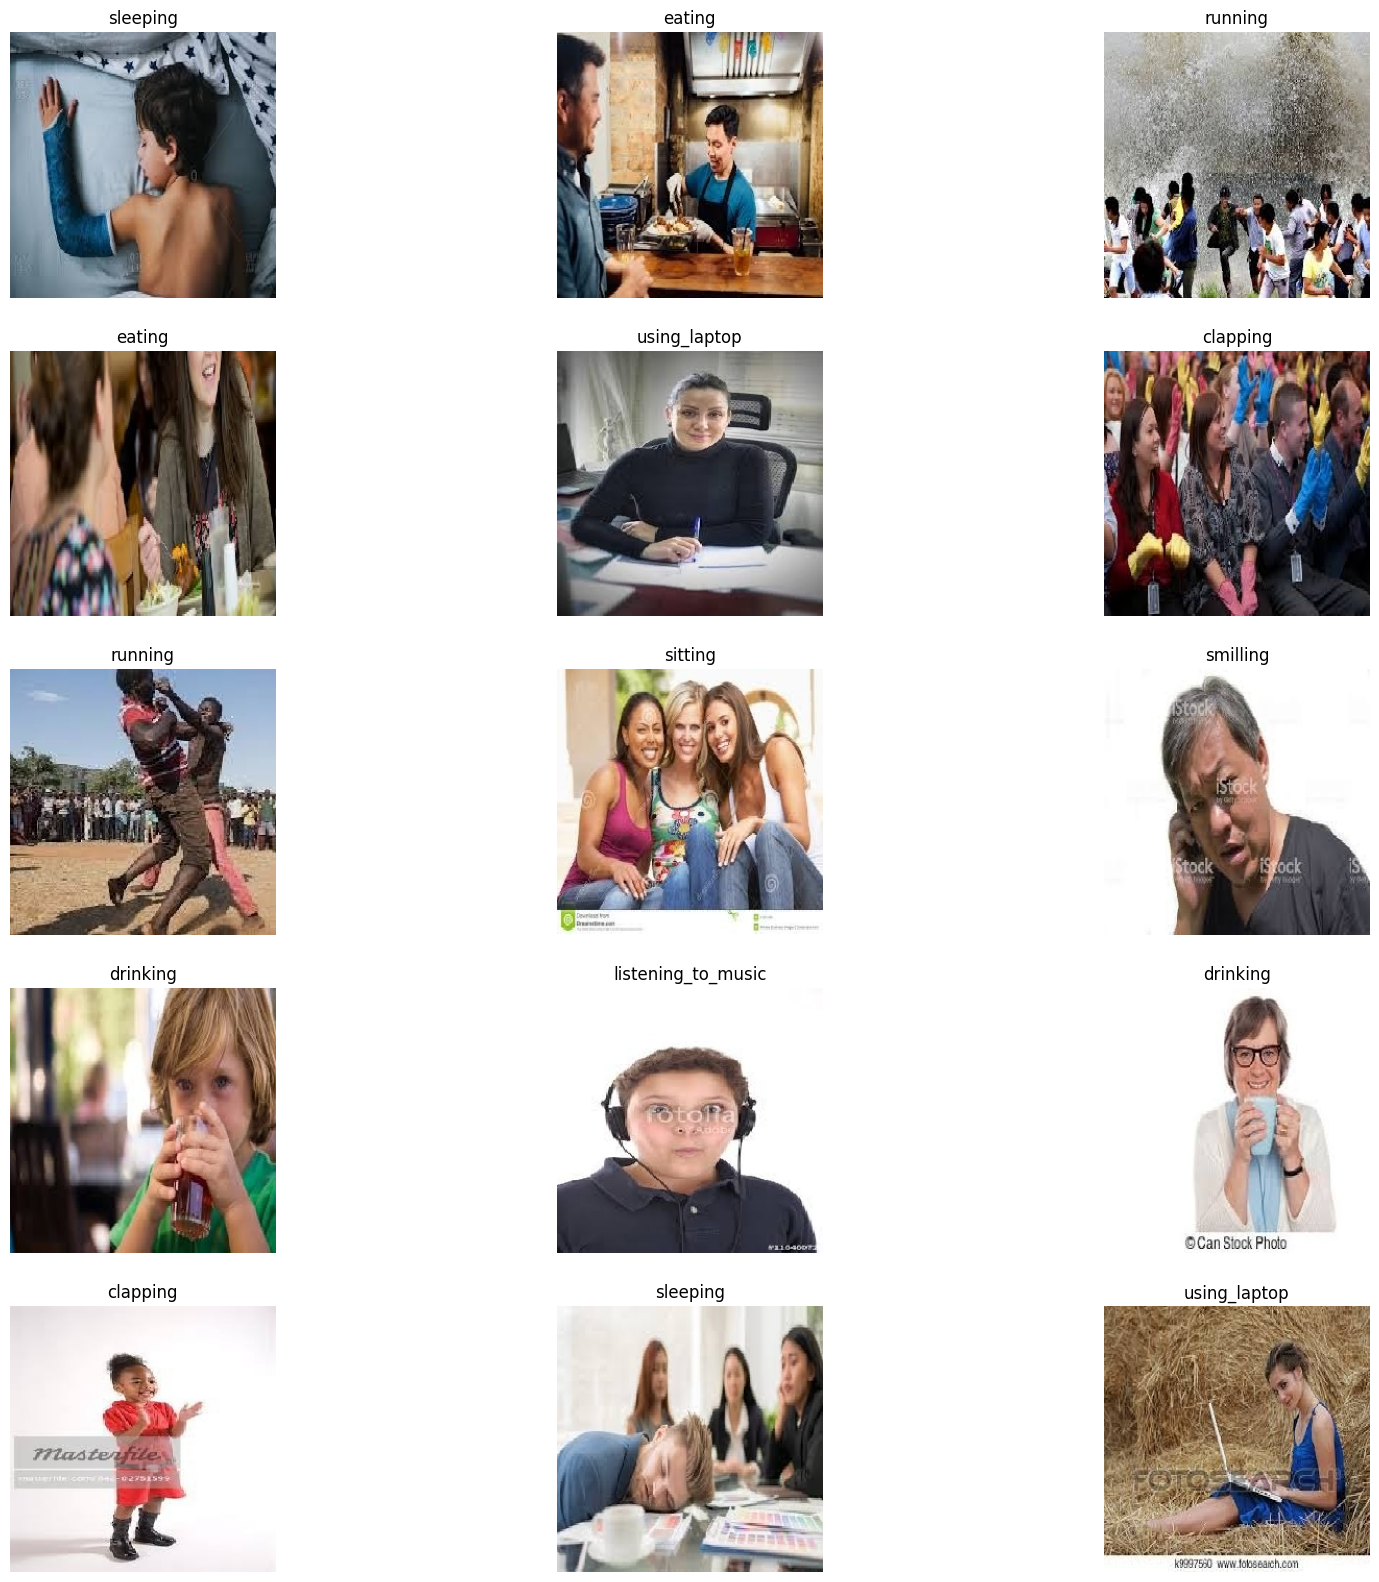

In [54]:
a=0
plt.figure(figsize=(20,20))
for i in range(0,15):
    #if i in label:
    #a = np.where(label==i)[0][0]

    plt.subplot(5,3, i+1)
    plt.imshow(img[i])
    plt.title(l[y_pred_index[i]])
    plt.axis('off')
    a+=1
    


**Xception model is able to predict most of the human action from images**

# **Test result of Inception model**

In [55]:
y_pred_incep = model_Inception.predict(test_generator)

338/338 [==============================] - 16s 44ms/step


In [56]:
y_pred_incep

array([[9.6725993e-04, 1.7112872e-03, 1.0936795e-03, ..., 4.7363257e-01,
        7.0515103e-03, 1.5521084e-03],
       [6.9453922e-04, 2.1490376e-03, 1.3465164e-03, ..., 5.7945156e-04,
        3.3421128e-03, 5.6725498e-03],
       [1.0614536e-02, 1.3281903e-01, 2.5134515e-02, ..., 5.4846383e-03,
        4.9520027e-02, 9.8862864e-02],
       ...,
       [2.7973256e-03, 1.3294477e-02, 4.3164180e-03, ..., 6.3173934e-03,
        1.0419537e-03, 7.4815634e-04],
       [3.6128520e-03, 7.3416799e-04, 1.1607212e-03, ..., 2.3484549e-02,
        6.3290810e-03, 3.7427980e-03],
       [1.8443366e-03, 3.4580866e-03, 4.7926563e-03, ..., 1.6967427e-03,
        2.0590107e-04, 2.9558394e-04]], dtype=float32)

In [57]:
y_pred_incep_index = y_pred_incep.argmax(axis=1)

In [60]:
y_pred_incep_index

array([12,  5, 11, ...,  3,  7,  3])

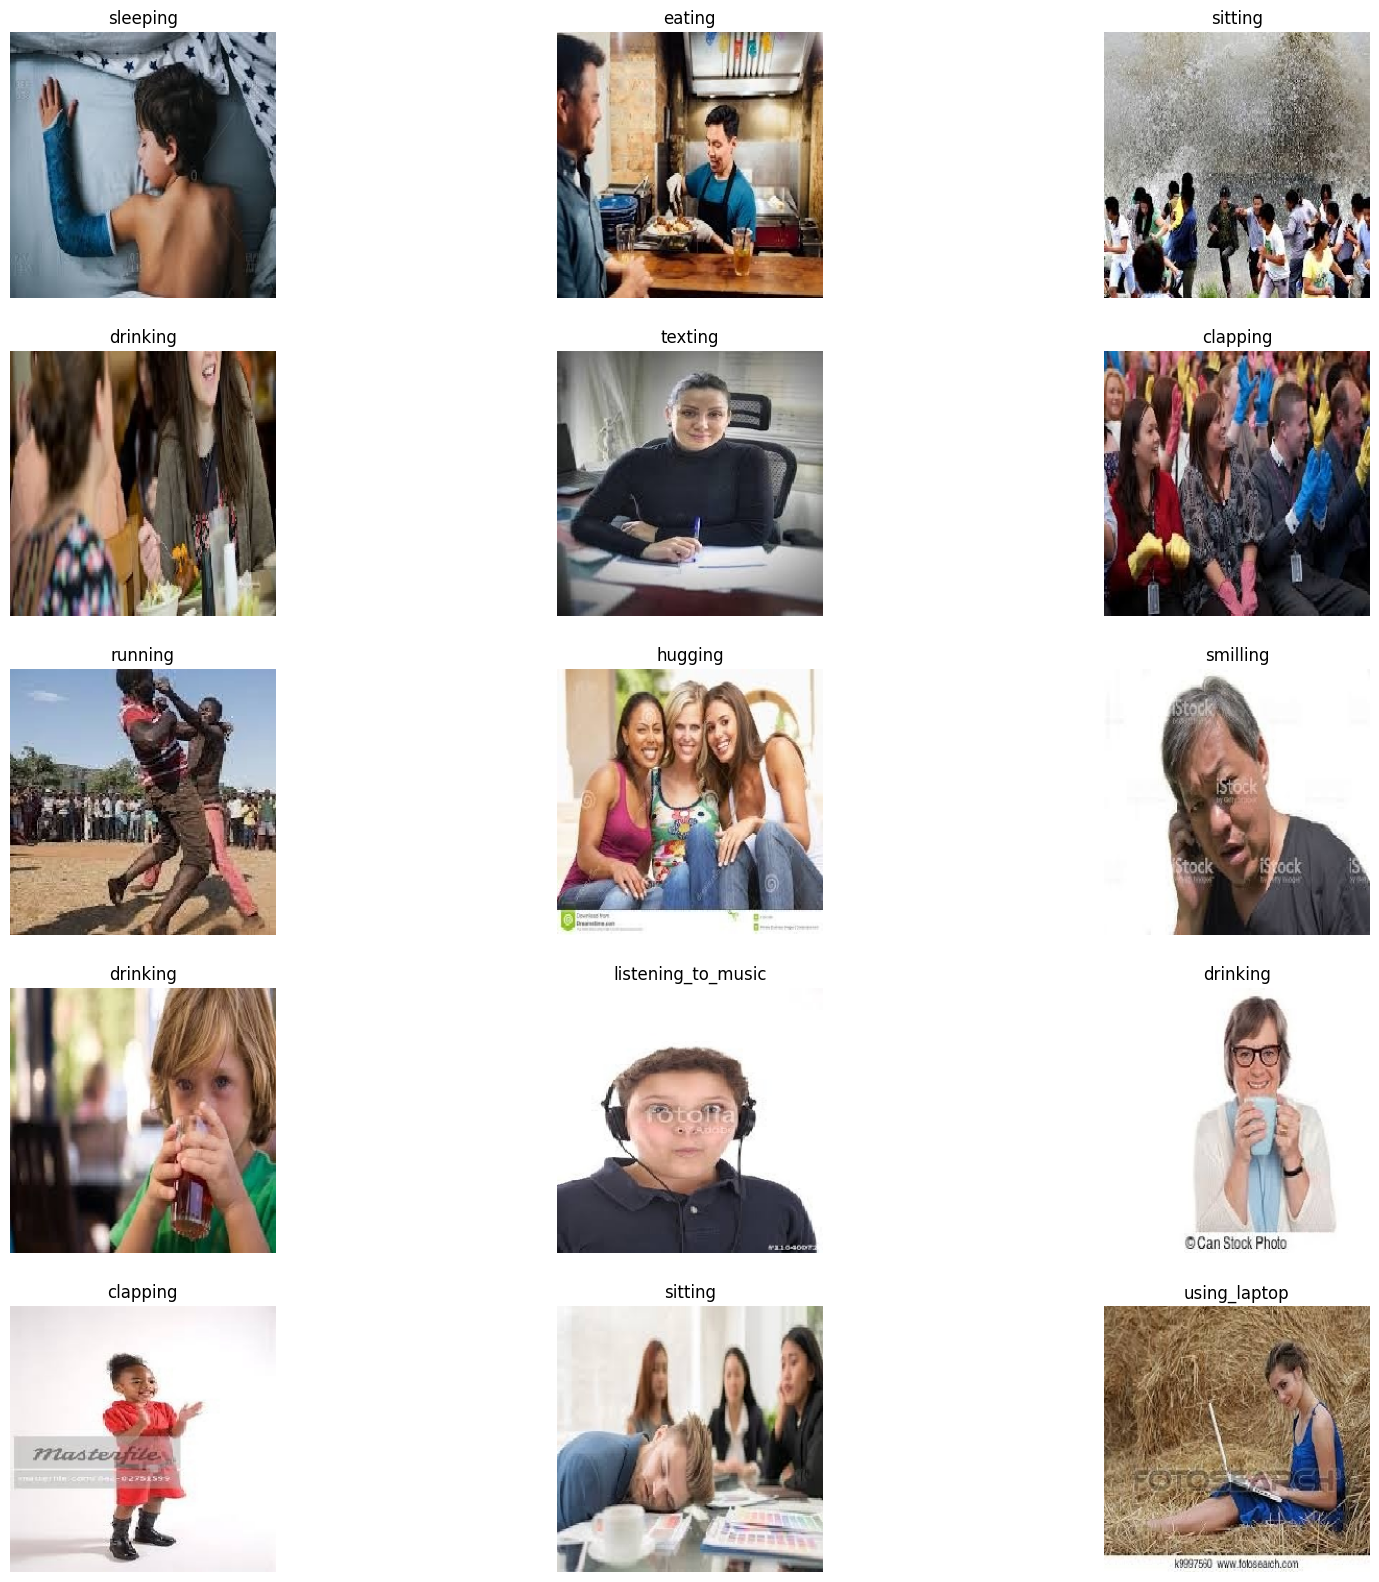

In [61]:
a=0
plt.figure(figsize=(20,20))
for i in range(0,30):
    #if i in label:
    #a = np.where(label==i)[0][0]
    plt.subplot(5,3, i+1)
    plt.imshow(img[i])
    plt.title(l[y_pred_incep_index[i]])
    plt.axis('off')
    
    


**Inception model is not giving much better results on test data**

# Conclusion:

**Xception model is performing better to predict human action and giving much better results on train, valid and test datasets.**